# Fraud Detection Overview

Fraud detection is one of the most important applications in data science, as the ability to detect fraud helps establish consumer trust and corporate integrity. Not to mention, eliminating fraud would prevent millions, if not billions, of dollars worth of loss and damages.

Depending on the data, running classification algorithms like logistic regression and SVM to detect fraud is relatively uncomplicated. There are the usual steps of collecting the data, cleaning it, and then running it through multiple models to obtain the best metric. To save time, automated machine learning programs can iterate through many machine learning and deep learning models to find the one that provides the best performance. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are over 280000 entries of data and going through all of that would be very computationally expensive, so lets just take a small sample as the train and test set. 

In [ ]:
#Save the first 50000 entries as training data
df[0:50000].to_csv('train.csv')

In [3]:
train = pd.read_csv('train.csv')
train.shape

(50000, 32)

In [ ]:
#save the next 10000 as test data
df[50000:60000].to_csv('test.csv')


In [4]:
test = pd.read_csv('test.csv')
print(test.shape)

(10000, 32)


## Quick Glance w/ info(), isna()sum(), and describe()

In [5]:
#provides overview of data types to see if any categorical data needs to be encoded; none here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#overview if any null values are present; none here
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#a good way to find placeholder nulls in numerical data. Usually this means looking at the min/max of each feature for any
#extremes; data doesn't seem to contain placeholder nulls or outliers
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<BarContainer object of 2 artists>

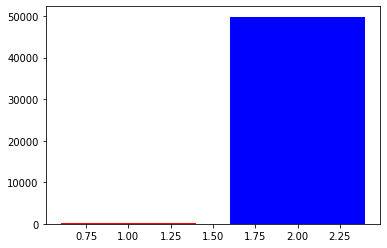

In [8]:
import matplotlib.pyplot as plt

no_fraud = train[train['Class']==0].shape[0]
fraud = train[train['Class']==1].shape[0]

plt.bar(x=[1,2], height = [fraud, no_fraud], color = ['red', 'blue'])

There's a great imbalance between fraudulent and non-fraudulent cases, which will affect our algorithms. Therefore, it's necessary to balance these classes. 

## Balancing Classes with SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = train.loc[:, train.columns != 'Class']
y = train['Class']

os = SMOTE(random_state=117)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

columns = X_train.columns

os_data_X, os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])

In [10]:
# Check the numbers
print("length of oversampled data is ",len(os_data_X))
print("Number of not fraud in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of fraud",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of not fraud in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  79758
Number of not fraud in oversampled data 39879
Number of fraud 39879
Proportion of not fraud in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [11]:
os_train = os_data_X
os_train['Class'] = os_data_y.values
os_train.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23573,32828.0,0.601467,-0.972097,-0.836823,0.285860,-0.246023,-0.971890,1.018488,-0.529431,...,0.168925,-0.323254,-0.505600,0.017159,0.509378,1.056221,-0.181210,0.056364,399.00,0
1,46656,42873.0,-0.992590,-0.329359,2.326593,-0.695860,0.032342,0.340383,0.056838,0.196443,...,-0.141609,-0.103302,-0.134270,-0.417595,0.304661,-0.375699,-0.108228,-0.153287,65.00,0
2,6358,7577.0,-0.318075,1.062283,1.759506,1.003932,0.426871,0.449983,0.604184,-0.124242,...,-0.199046,-0.065634,-0.163249,-0.574275,-0.229511,-0.414992,0.214577,-0.031305,36.00,0
3,13801,24468.0,-9.970943,-4.156007,0.059100,2.745572,2.812815,-1.567950,1.336645,-2.428785,...,-3.340266,1.091950,3.545291,0.601934,1.824614,0.045613,2.200767,-1.341030,18.14,0
4,15669,27089.0,-0.413949,1.112684,1.586218,-0.041054,0.026548,-0.881305,0.757186,-0.118384,...,-0.217986,-0.518803,-0.036909,0.386680,-0.162144,0.068418,0.271848,0.122978,0.89,0


<BarContainer object of 2 artists>

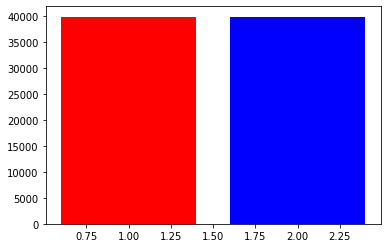

In [12]:
no_fraud = os_train[os_train['Class']==0].shape[0]
fraud = os_train[os_train['Class']==1].shape[0]

plt.bar(x=[1,2], height = [fraud, no_fraud], color = ['red', 'blue'])